# Pseudocode

In [ ]:
# Create an webcam to show a video
# Capture the hand
    # We install the mediapipe library
    # We use the holistic and drawing utils in the mediapipe.solutions library
    # We loop through the mp_hand obtained earier to be able to use the hand function
    # We set use the hand and drawing utils to capture the hand
        # We first convert the video to RGB
        # We train the frame
        # Convert it back to BGR
        # We draw using the landmarks obtained from the result and the connections obtained from the drawing_tils

# Obtain the landmarks in a list
    # We first obtain the landmark from hand_landmarks.landmark, we use loop to get the x, y, z and visibility
    # We cnvert it to an array
    # We apply the list function to convert it to a list
# Save the landmarks in a csv file (I'll save it for each class)
    # We will first create a row for the file using list comprehension.
    # We will then save it to our csv file using the csv module (csv.writerow())
    # As each frame in the video runs, it will get the landmarks to be equal to the lenght of the column in the row as a list
    # We will then append the list of the landmarks into the csv file as each frame runs
    # There are 21 landmarks on the human hand
    # Ther will be (x, y, z, visibility) making 84 elements in the list
    # If we add the class names it will make 85 in total.
    
# Train it
    # For training, i will use the random forrest, logistic regression, ridge classifier and gradient boosting classifier.
    # The rest are the normal machine learning training steps
# Predict the class for which the hand posture belongs to.
    # We will first get the saved file from the pre trained model
    # We will now apply it in the main detection video webcam to predict it.
    # Once it has been predicted, we will use the opencv library to show it.

# Import The Necessary Dependences

In [71]:
import mediapipe as mp
import cv2 as cv
import numpy as np

In [16]:
mp_drawing = mp.solutions.drawing_utils
mp_holistics = mp.solutions.holistic

# Setting up the cam and doing some detections

In [45]:
cap = cv.VideoCapture(0)

with mp_holistics.Holistic(min_detection_confidence= 0.3, min_tracking_confidence= 0.3) as holistics:
    while cap.isOpened():
        ret, frame = cap.read()

        # convert the color of the image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        
        # Render detection by passing it into the model
        results = holistics.process(image)
        
        # Convert it back to BGR
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        
        # Draw landmarks (left_hand_landmarks and right_hand_landmarks)
        # left hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistics.HAND_CONNECTIONS)
        # right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistics.HAND_CONNECTIONS)


        cv.imshow("Window", image)
        if cv.waitKey(10) & 0xFF ==ord('q'):
            break
cap.release()
cv.destroyAllWindows()

In [97]:
cap.release()
cv.destroyAllWindows()

In [49]:
norm_coords = len(results.right_hand_landmarks.landmark) + len(results.left_hand_landmarks.landmark)
norm_coords

42

# Saving the hand posture to csv

In [203]:
noR = (21 + 21)
noR

42

In [204]:
list_landmark = ['className']
for i in range(1, noR+1):
    list_landmark += [f"x{i}", f"y{i}", f"z{i}", f"v{i}"]

In [207]:
list_landmark

['className',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32'

In [209]:
import csv
import os

with open("train.csv", mode='w', newline= '') as f:
    csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_writer.writerow(list_landmark)

In [215]:
class_name = "C"

In [216]:
cap = cv.VideoCapture(0)

with mp_holistics.Holistic(min_detection_confidence= 0.3, min_tracking_confidence= 0.3) as holistics:
    while cap.isOpened():
        ret, frame = cap.read()

        # convert the color of the image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        
        # Render detection by passing it into the model
        results = holistics.process(image)
        
        # Convert it back to BGR
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        
        # Draw landmarks (left_hand_landmarks and right_hand_landmarks)
        # left hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistics.HAND_CONNECTIONS)
        # right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistics.HAND_CONNECTIONS)
        

        left_hand = results.left_hand_landmarks
        right_hand = results.right_hand_landmarks
        
        try:
            if left_hand == None:
                left_row = list(np.zeros(21*4))
                right_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in right_hand.landmark]).flatten())
            elif right_hand == None:
                right_row = list(np.zeros(21*4))
                left_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in left_hand.landmark]).flatten())
            else:
                left_hand = left_hand.landmarks
                right_hand = right_hand.landmarks

                left_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in left_hand]).flatten())
                right_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in right_hand]).flatten())


            # Lets add the both landmarks together

            # Adding the two list together
            landm = left_row + right_row

            # Inserting the class name at the first row
            landm.insert(0, class_name)

            # Putting each and every parameter the csv file
            with open("train.csv", mode='a', newline= '') as f:
                csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
                csv_writer.writerow(landm)
        except:
            pass

        


        cv.imshow("Window", image)
        if cv.waitKey(10) & 0xFF ==ord('q'):
            break
cap.release()
cv.destroyAllWindows()

# Splitting into train and test

In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [218]:
df = pd.read_csv("train.csv")
df

,className,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z40,v40,x41,y41,z41,v41,x42,y42,z42,v42
0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.024868,0.0,0.305741,0.493015,-0.029464,0.0,0.314172,0.467092,-0.032112,0.0
1,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066724,0.0,0.271281,0.511452,0.070705,0.0,0.273755,0.524873,0.073887,0.0
2,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022808,0.0,0.244337,0.512810,0.025413,0.0,0.244407,0.531069,0.033290,0.0
3,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009296,0.0,0.250447,0.523028,0.012498,0.0,0.249559,0.547523,0.020873,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002655,0.0,0.244461,0.532349,0.007458,0.0,0.244104,0.564742,0.018219,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012446,0.0,0.339432,0.503174,0.006443,0.0,0.372492,0.525034,0.001802,0.0
678,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009813,0.0,0.341402,0.504481,0.006666,0.0,0.373428,0.529239,0.004395,0.0
679,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023735,0.0,0.341245,0.495930,0.021187,0.0,0.371325,0.520791,0.017792,0.0
680,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010920,0.0,0.346033,0.501351,0.006745,0.0,0.378847,0.526295,0.003368,0.0


In [225]:
df.head()

,className,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z40,v40,x41,y41,z41,v41,x42,y42,z42,v42
0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.024868,0.0,0.305741,0.493015,-0.029464,0.0,0.314172,0.467092,-0.032112,0.0
1,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066724,0.0,0.271281,0.511452,0.070705,0.0,0.273755,0.524873,0.073887,0.0
2,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022808,0.0,0.244337,0.512810,0.025413,0.0,0.244407,0.531069,0.033290,0.0
3,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009296,0.0,0.250447,0.523028,0.012498,0.0,0.249559,0.547523,0.020873,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002655,0.0,0.244461,0.532349,0.007458,0.0,0.244104,0.564742,0.018219,0.0


In [226]:
df.tail()

,className,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z40,v40,x41,y41,z41,v41,x42,y42,z42,v42
677,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012446,0.0,0.339432,0.503174,0.006443,0.0,0.372492,0.525034,0.001802,0.0
678,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009813,0.0,0.341402,0.504481,0.006666,0.0,0.373428,0.529239,0.004395,0.0
679,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023735,0.0,0.341245,0.495930,0.021187,0.0,0.371325,0.520791,0.017792,0.0
680,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010920,0.0,0.346033,0.501351,0.006745,0.0,0.378847,0.526295,0.003368,0.0
681,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007364,0.0,0.343664,0.501641,0.000695,0.0,0.376020,0.525489,-0.004111,0.0


In [227]:
df[df.className == 'B']

,className,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z40,v40,x41,y41,z41,v41,x42,y42,z42,v42
180,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035976,0.0,0.278144,0.523078,-0.042505,0.0,0.286309,0.476556,-0.044901,0.0
181,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049205,0.0,0.275545,0.525689,-0.058239,0.0,0.284006,0.479390,-0.061973,0.0
182,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.060874,0.0,0.275414,0.525002,-0.070215,0.0,0.283289,0.482405,-0.074452,0.0
183,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041707,0.0,0.280714,0.521248,-0.048812,0.0,0.288415,0.477953,-0.051232,0.0
184,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033169,0.0,0.275913,0.507612,-0.038115,0.0,0.282405,0.464420,-0.039529,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.013902,0.0,0.304163,0.469118,-0.018361,0.0,0.309931,0.430532,-0.021415,0.0
347,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006717,0.0,0.308492,0.470879,-0.011651,0.0,0.310689,0.431755,-0.014975,0.0
348,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000648,0.0,0.307492,0.466716,-0.005977,0.0,0.311832,0.424659,-0.009859,0.0
349,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019807,0.0,0.309695,0.475399,-0.024105,0.0,0.313985,0.434560,-0.026953,0.0


In [230]:
X = df.drop("className", axis = 1)
y = df.className

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [238]:
pipelines = {
    'linearReg': make_pipeline(StandardScaler(), LogisticRegression()),
    'randomForrest' : make_pipeline(StandardScaler(), RandomForestClassifier()),
    'decisionTree' : make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'ridgeReg' : make_pipeline(StandardScaler(), RidgeClassifier()),
    'gradBoosting' : make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

# Training process

In [247]:
model_fit = {}
for algorithm, pipeline in pipelines.items():
    model_fit[algorithm] = pipeline.fit(x_train, y_train)

In [258]:
y_test = model_fit['randomForrest'].predict(x_test)
y_test

array(['B', 'A', 'B', 'A', 'B', 'C', 'C', 'A', 'B', 'C', 'B', 'C', 'B',
       'A', 'B', 'B', 'A', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'B', 'C',
       'B', 'C', 'A', 'C', 'B', 'C', 'B', 'A', 'A', 'C', 'C', 'C', 'A',
       'A', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'A', 'C',
       'C', 'B', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'C', 'A', 'C', 'C',
       'C', 'B', 'A', 'C', 'A', 'C', 'B', 'A', 'A', 'B', 'A', 'C', 'A',
       'A', 'B', 'B', 'A', 'A', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'C',
       'A', 'C', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'C', 'B', 'B', 'A',
       'C', 'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'C', 'B', 'C', 'A',
       'C', 'A', 'C', 'A', 'C', 'B', 'C', 'C', 'B', 'C', 'B', 'A', 'C',
       'C', 'C', 'A', 'A', 'A', 'B', 'C', 'C', 'B', 'C', 'A', 'B', 'C',
       'C', 'B', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'C', 'C', 'C',
       'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'C',
       'C', 'B'], dtype=object)

In [245]:
from sklearn.metrics import accuracy_score

In [249]:
result = {}
for algorithm, pipeline in pipelines.items():
    y_pred = pipeline.predict(x_test)
    result[algorithm] = accuracy_score(y_test, y_pred)

In [250]:
result

{'linearReg': 1.0,
 'randomForrest': 1.0,
 'decisionTree': 0.9941520467836257,
 'ridgeReg': 1.0,
 'gradBoosting': 0.9941520467836257}

# Save the trained model

In [263]:
import pickle
with open("ssLang.pkl", mode = 'wb') as f:
    pickle.dump(model_fit['randomForrest'], f)

# Load the model for detection

In [264]:
with open("ssLang.pkl", mode = "rb") as f:
    model = pickle.load(f)

In [328]:
cap = cv.VideoCapture(0)

with mp_holistics.Holistic(min_detection_confidence= 0.3, min_tracking_confidence= 0.3) as holistics:
    while cap.isOpened():
        ret, frame = cap.read()

        # convert the color of the image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        
        # Render detection by passing it into the model
        results = holistics.process(image)
        
        # Convert it back to BGR
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        
        # Draw landmarks (left_hand_landmarks and right_hand_landmarks)
        # left hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistics.HAND_CONNECTIONS)
        # right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistics.HAND_CONNECTIONS)
        

        left_hand = results.left_hand_landmarks
        right_hand = results.right_hand_landmarks
        
        try:
            if left_hand == None:
                left_row = list(np.zeros(21*4))
                right_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in right_hand.landmark]).flatten())
            elif right_hand == None:
                right_row = list(np.zeros(21*4))
                left_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in left_hand.landmark]).flatten())
            else:
                left_hand = left_hand.landmarks
                right_hand = right_hand.landmarks

                left_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in left_hand]).flatten())
                right_row = list(np.array([[landmarks.x, landmarks.y, landmarks.z, landmarks.visibility] for landmarks in right_hand]).flatten())


            # Lets add the both landmarks together

            # Adding the two list together
            landm = left_row + right_row
            
            
            X = pd.DataFrame([landm])
            lang_prediction = model.predict(X)[0]
            lang_probability = model.predict_proba(X)[0]
            
            
            # Display Class
            cv.putText(image, 'ALPHABET',
                      (95, 12), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv.LINE_AA)
            cv.putText(image, lang_prediction.split(' ')[0],
                      (90, 100), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv.LINE_AA)
            
            # For probability
            cv.putText(image, 'PROBABILITY', (15, 12), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv.LINE_AA)
            cv.putText(image, str(round(lang_probability[np.argmax(lang_probability)], 2)), (10, 100),
                       cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv.LINE_AA)
            print(lang_probability)
            
            
        except:
            pass

        
        cv.imshow("Window", image)
        if cv.waitKey(10) & 0xFF ==ord('q'):
            break
cap.release()
cv.destroyAllWindows()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.69 0.16 0.15]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.3  0.28 0.42]
[0.33 0.27 0.4 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.29 0.25 0.46]
[0.1  0.22 0.68]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.26 0.3  0.44]
[0.27 0.32 0.41]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.26 0.36 0.38]
[0.27 0.37 0.36]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.27 0.34 0.39]
[0.26 0.33 0.41]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.23 0.36 0.41]
[0.23 0.38 0.39]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.21 0.41 0.38]
[0.21 0.42 0.37]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.21 0.41 0.38]
[0.21 0.39 0.4 ]
[0.19 0.41 0.4 ]
[0.21 0.39 0.4 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid f

[0.21 0.36 0.43]
[0.23 0.34 0.43]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.23 0.32 0.45]
[0.2  0.37 0.43]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.21 0.41 0.38]
[0.2 0.3 0.5]


# Still working on the 3D text

In [281]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a blank image
image = np.zeros((300, 400, 3), dtype=np.uint8)

# Set the 3D text parameters
text = "Hello, 3D World!"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2

# Get the size of the text box
text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)

# Calculate the position to center the text in the image
text_x = (image.shape[1] - text_size[0]) // 2
text_y = (image.shape[0] + text_size[1]) // 2

# Draw the 3D text on the image
cv2.putText(image, text, (text_x, text_y), font, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)
cv2.putText(image, text, (text_x + 1, text_y + 1), font, font_scale, (0, 0, 0), font_thickness, cv2.LINE_AA)
# Display the image
cv2.imshow('3D Text Example', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


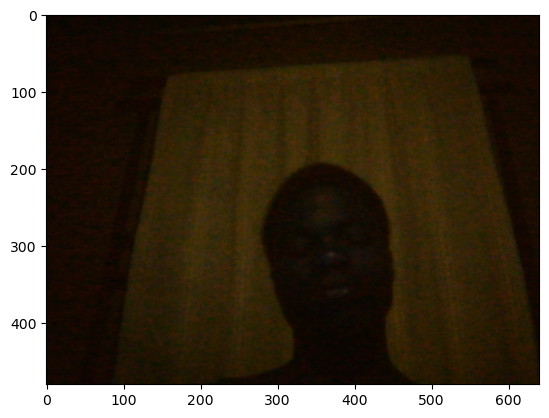

In [329]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [326]:
str(round(lang_probability[np.argmax(lang_probability)], 2))

'0.93'